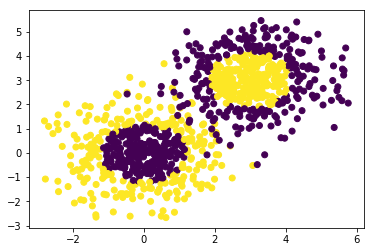

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report

#生成二维正态分布，生成的数据按照分位数分为两类，500个样本，2个样本特征
x1,y1 = make_gaussian_quantiles(n_samples=500,n_features=2,n_classes=2)
#生成二维正态分布，生成的数据按分位数为两类，400个样本，2个样本特征均值都为3
x2,y2 = make_gaussian_quantiles(mean=(3,3),n_samples=500,n_features=2,n_classes=2)


x_data = np.concatenate((x1,x2))
y_data = np.concatenate((y1,-y2+1))

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

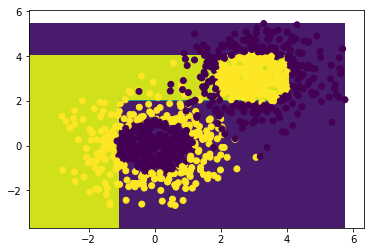

In [6]:
model = tree.DecisionTreeClassifier(max_depth=3)

model.fit(x_data,y_data)

x_min,x_max =x_data[:,0].min()-1,x_data[:,0].max()
y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max()

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

cs = plt.contourf(xx,yy,z)

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [7]:
model.score(x_data,y_data)

0.787

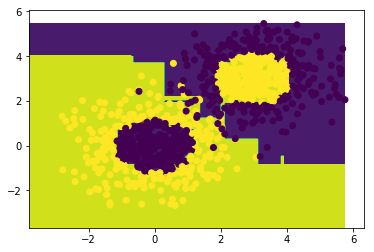

In [8]:
#model = tree.DecisionTreeClassifier(max_depth=3)

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)

model.fit(x_data,y_data)

x_min,x_max =x_data[:,0].min()-1,x_data[:,0].max()
y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max()

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

cs = plt.contourf(xx,yy,z)

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [9]:
model.score(x_data,y_data)

0.983